<a href="https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/nlp/01_Exploring_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Exploring Word Embeddings
In this notebook, we'll look at trained word embeddings. We'll plot the embeddings so we can attempt to visually compare embeddings. We'll then look at analogies and word similarities. We'll use the Gensim library which makes it easy to work with embeddings.

In [1]:
import gensim
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore') #mm?

#### Download a table of pre-trained embeddings

In [2]:
# Download embeddings (66MB, glove, trained on wikipedia)
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


What's the embedding of 'king'?

In [3]:
model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

 1.9927   -2.223  

#### How many words does this table have?

In [4]:
model.vectors.shape

(400000, 50)

Which means:
* 400,000 words (vocab_size)
* Each has an embedding composed of 50 numbers (embedding_size)

### Visualizing the embedding vector
Let's plot the vector so we can have a colorful visual of values in the embedding vector

In [5]:

def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)     #aaaa  vmax=2, vmin=-2,
    
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

Let's plot the embedding of `king`

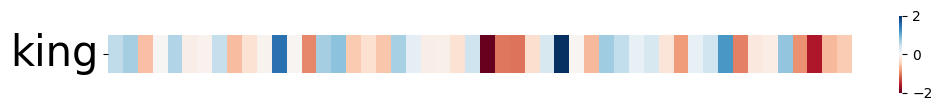

In [7]:
plot_embeddings([model['king']], ['king'])

We can also compare multiple embeddings:

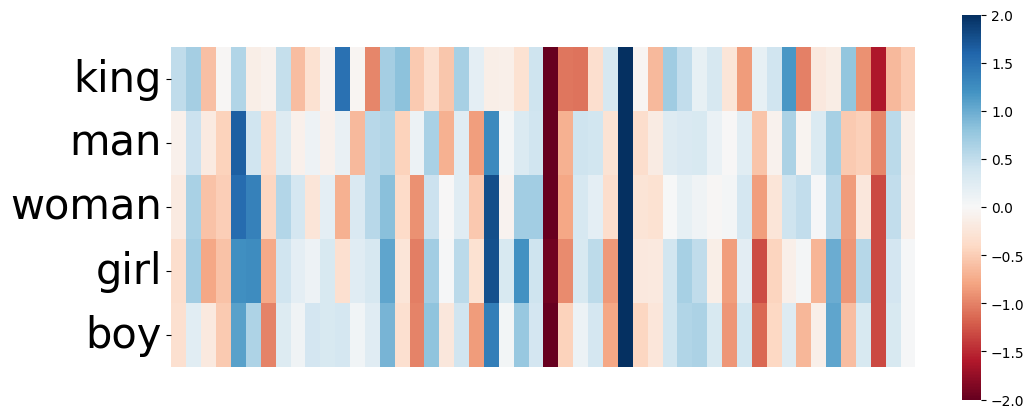

In [8]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

Here's another example including a number of different concepts:

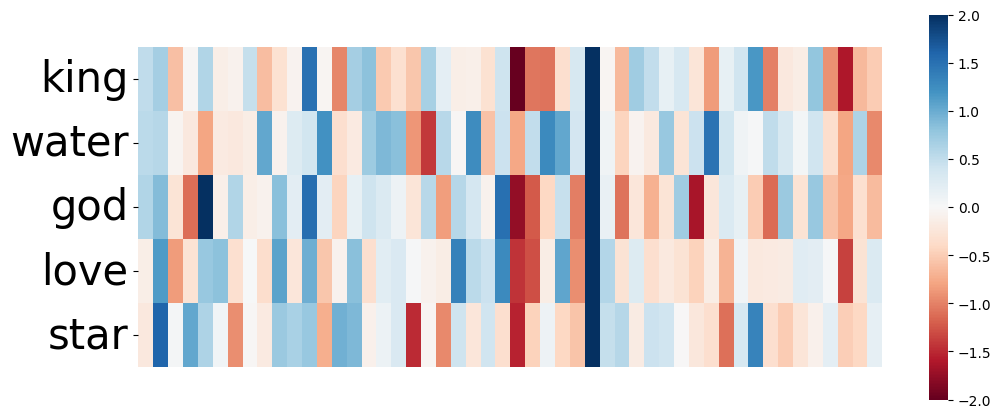

In [10]:
plot_embeddings([model['king'], model['water'], model['god'], model['love'], model['star']],
              ['king', 'water', 'god', 'love', 'star'])

## Analogies
### king - man + woman  = ?

In [12]:
model.most_similar(positive=["king", "woman"]   )

[('father', 0.8825904726982117),
 ('mother', 0.8679479956626892),
 ('son', 0.8517908453941345),
 ('man', 0.8433941602706909),
 ('daughter', 0.8359057903289795),
 ('her', 0.8291953206062317),
 ('wife', 0.8246533274650574),
 ('queen', 0.8238972425460815),
 ('brother', 0.812282383441925),
 ('she', 0.8077202439308167)]

In [11]:
model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

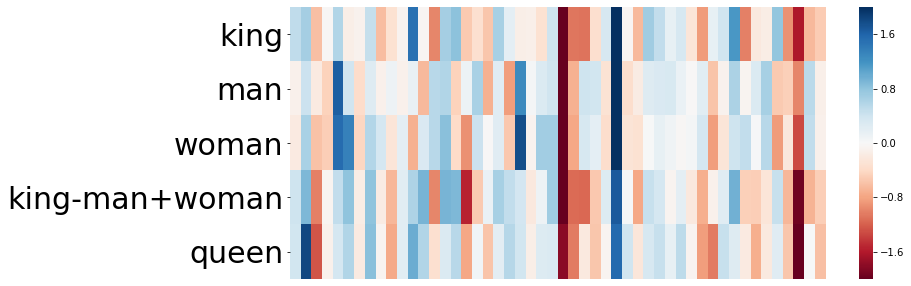

In [56]:
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'king-man+woman', 'queen'])

**2019 update**: This turned out to be a misconception. The result is actually closer to "king" than it is to "queen", it's just that the code rules out the input vectors as possible outputs   #aaaa


[Fair is Better than Sensational:Man is to Doctor as Woman is to Doctor](https://arxiv.org/abs/1905.09866)

To verify, let's calculate cosine distance between the result of the analogy, and `queen`.

In [35]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))

array([[0.8609581]], dtype=float32)

Let's compare that to the distance between the result and `king`:

In [36]:
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.8859834]], dtype=float32)

So the result is more similar to king (0.8859834 similarity score) than it is to queen (0.8609581 similarity score).

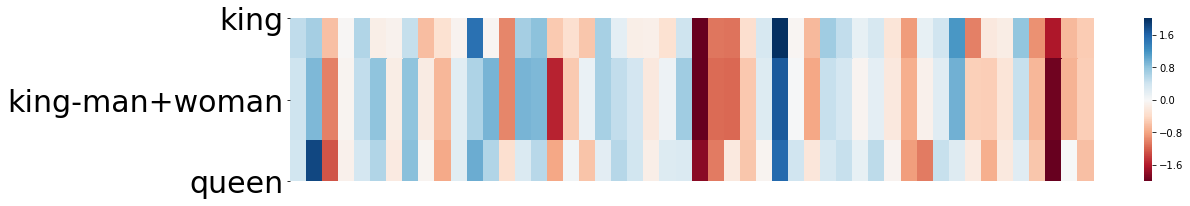

In [38]:
plot_embeddings( [model['king'],
                 result, 
                 model['queen']],
                 ['king', 'king-man+woman', 'queen'])

## Exercise: doctor - man + woman = ?

In [ ]:
# TODO: fill-in values
model.most_similar(positive=[], negative=[])

### Verify: Is it, really?

In [ ]:
# TODO: do analogy algebra
result = model[''] - model[''] + model['']

# Similarity between result and 'nurse'
cosine_similarity(result.reshape(1, -1), model['nurse'].reshape(1, -1))

In [ ]:

# Similarity between result and 'doctor'
cosine_similarity(result.reshape(1, -1), model['doctor'].reshape(1, -1))